In [11]:
!pip install sklearn

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, classification_report
from Models.functions.utils import listProblems
from Models.functions.plot import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

ImportError: DLL load failed: Não foi possível encontrar o procedimento especificado.

In [12]:
from pprint import pprint

In [28]:
reports = dict(
    baseline1 = '../baseline1/Reports_v2_balanced/',
    baseline2 = '../baseline2/Reports/',
    baseline3 = '../baseline3/Reports/',
    baseline3_1_1 = '../baseline3/Reports1.1/',
    #baseline3_grid = '../baseline3/Reports_grid/',
    baseline4 = '../baseline4/Reports_grid/',
    baseline5 = '../baseline5/Reports_grid/'
)

SyntaxError: invalid syntax (<ipython-input-8-8fdc27c23d82>, line 8)

In [29]:
import os

In [30]:
!ls {reports['baseline5']}'/gender/b5post'

ls: cannot access '../baseline5/Reports_grid//gender/b5post': No such file or directory


In [31]:
def get_metrics(exp, pred): return f1_score(np.load(exp), np.load(pred), average="macro")
def get_metrics2(exp, pred): return f1_score(exp, pred, average="macro")
    
def get_baseline1(task, dataset_name, lang):    
    baseline1 = reports['baseline1']
    bar = '/' 
    lang2 = '_'+lang
    
    exp  = baseline1 + task +bar+ dataset_name +lang2+bar+'expected_y.numpy.npy'
    pred = baseline1 + task +bar+ dataset_name +lang2+bar+'predicted_y.numpy.npy'
    
    return get_metrics(exp, pred)

def get_baseline2(task, dataset_name, lang, v = 1):    
    baseline2 = reports['baseline2']
    bar = '/' 
    lang2 = '_'+lang if v == 1 else ''
    
    if os.path.exists(baseline2 + task +bar+ dataset_name +lang2+bar):
        exp  = baseline2 + task +bar+ dataset_name +lang2+bar+'expected.numpy.npy'
        pred = baseline2 + task +bar+ dataset_name +lang2+bar+'predicted_proba.numpy.npy'
    elif os.path.exists(baseline2 + task +bar+ dataset_name +bar):
        exp  = baseline2 + task +bar+ dataset_name +bar+'expected.numpy.npy'
        pred = baseline2 + task +bar+ dataset_name +bar+'predicted_proba.numpy.npy'
    else:
        exp  = '/tmp/'
        pred = '/tmp/'

    exp, pred = np.load(exp), np.load(pred)

    if type(pred[0]) != np.int64 and len(pred[0]) > 1:        
        pred = np.argmax(pred, axis=1)
    
    return get_metrics2(exp, pred)

def get_baseline3(task, dataset_name, lang):    
    baseline3 = reports['baseline3']
    bar = '/' 
    try:
        exp  = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'expected.numpy.npy'
        pred = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'predicted.numpy.npy'
        f1 = get_metrics(exp, pred)        
    except:
        f1 = 0
    
    return f1

def get_baseline4(task, dataset_name, lang):    
    baseline3 = reports['baseline4']
    bar = '/' 
    try:
        exp  = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'expected.numpy.npy'
        pred = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'predicted.numpy.npy'
        f1 = get_metrics(exp, pred)
    except:
        f1 = 0
    
    return f1

def get_baseline_grid(task, dataset_name, lang, baseline):    
    baseline4 = reports[baseline]
    bar = '/' 
    try:
        exp  = baseline4 + task +bar+ dataset_name +'_'+lang+bar+'expected.numpy.npy'
        pred = baseline4 + task +bar+ dataset_name +'_'+lang+bar+'predicted.numpy.npy'
        f1 = get_metrics(exp, pred)
    except:
        f1 = 0
    
    return f1

In [40]:
def check(dataset_name, task,v=1):
    """
    params: task
    return: dataframe
    """
    results = pd.DataFrame({'dataset': [], 'lang': [], 'task': [], 
                            'baseline1': [], 
                            'baseline2': [], 
                            'baseline3': [], #'baseline3.1.1': [], 'baseline3_grid': [],
                            'baseline4': []})
    
    for p in listProblems(filter_dataset_name = dataset_name, filter_task = task):
        bar = '/'
        task = p[0]
        dataset_name = p[1]
        lang = p[2]
        
        d = {
            'idx': dataset_name+'_'+task+'_'+lang,
            'dataset': dataset_name,
            'lang': lang,
            'task': task,
            'baseline1': get_baseline1(task, dataset_name, lang),
            'baseline2': get_baseline2(task, dataset_name, lang),
            'baseline3': get_baseline3(task, dataset_name, lang),
            #'baseline3.1.1': get_baseline3_1_1(task, dataset_name, lang),
            'baseline4': get_baseline_grid(task, dataset_name, lang, 'baseline4'),
            'baseline5': get_baseline_grid(task, dataset_name, lang, 'baseline5')
        }

        results = results.append(d, ignore_index=True)
        
    results = results.set_index('idx')
    return results

### b5post, brmoral, esic, pan13, enblog

,baseline1,baseline2,baseline3,baseline4,dataset,lang,task,baseline5
idx,,,,,,,,
b5post_gender_pt,0.866651,0.625177,0.533351,0.746351,b5post,pt,gender,0.568805
b5post_age_pt,0.576645,0.490736,0.368482,0.553896,b5post,pt,age,0.302955
b5post_religion_pt,0.443835,0.425869,0.394232,0.470402,b5post,pt,religion,0.319055
b5post_it_pt,0.679319,0.592385,0.535493,0.641852,b5post,pt,it,0.561305


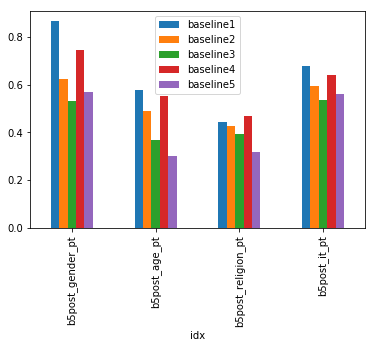

In [41]:
df = check('b5post',None,v=1)
df.plot(kind='bar')
display(df)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,baseline1,baseline2,baseline3,baseline4,dataset,lang,task,baseline5
idx,,,,,,,,
brmoral_gender_pt,0.628077,0.544545,0.428825,0.673691,brmoral,pt,gender,0.330422
brmoral_age_pt,0.404076,0.335857,0.365251,0.370310,brmoral,pt,age,0.362482
brmoral_religion_pt,0.406396,0.355697,0.321121,0.223403,brmoral,pt,religion,0.260732
brmoral_education_pt,0.402892,0.306579,0.353766,0.347481,brmoral,pt,education,0.244438
brmoral_it_pt,0.631188,0.596791,0.519444,0.655969,brmoral,pt,it,0.478723
brmoral_politics_pt,0.491131,0.377561,0.305791,0.287269,brmoral,pt,politics,0.176967


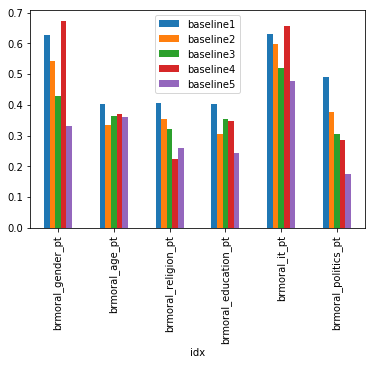

In [42]:
df = check('brmoral',None)
df.plot(kind='bar')#, figsize=(5,5))
display(df)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,baseline1,baseline2,baseline3,baseline4,dataset,lang,task,baseline5
idx,,,,,,,,
esic_gender_pt,0.366509,0.576841,0.502885,0.621898,esic,pt,gender,0.714097
esic_age_pt,0.580887,0.435316,0.399177,0.405766,esic,pt,age,0.517950
esic_education_pt,0.578778,0.472374,0.435546,0.417087,esic,pt,education,0.513464
esic_profession_pt,0.533206,0.372463,0.322516,0.338396,esic,pt,profession,0.447265
esic_region_pt,0.604788,0.277929,0.148619,0.270116,esic,pt,region,0.372573
esic_city_pt,0.705607,0.574884,0.576721,0.557602,esic,pt,city,0.638797


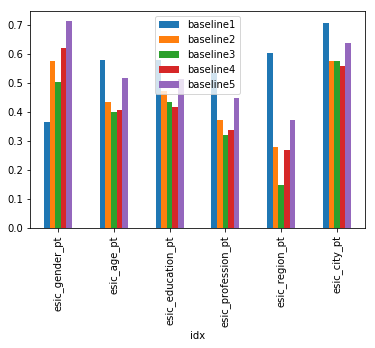

In [43]:
df = check('esic',None)
df.plot(kind='bar')
display(df)

,baseline1,baseline2,baseline3,baseline4,dataset,lang,task,baseline5
idx,,,,,,,,
enblog_gender_en,0.741315,0.756816,0.734750,0.550132,enblog,en,gender,0.550132
enblog_age_en,0.715083,0.728921,0.590814,0.526846,enblog,en,age,0.526846


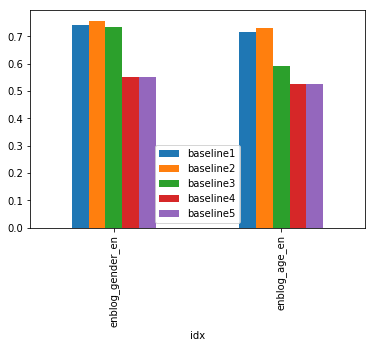

In [44]:
df = check('enblog',None,v=1)
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
display(df)

,baseline1,baseline2,baseline3,baseline4,dataset,lang,task,baseline5
idx,,,,,,,,
brblogset_gender_pt,0.753827,0.731908,0.0,0.627491,brblogset,pt,gender,0.663823
brblogset_age_pt,0.320314,0.485983,0.0,0.368427,brblogset,pt,age,0.358772
brblogset_education_pt,0.362620,0.320799,0.0,0.240722,brblogset,pt,education,0.238347


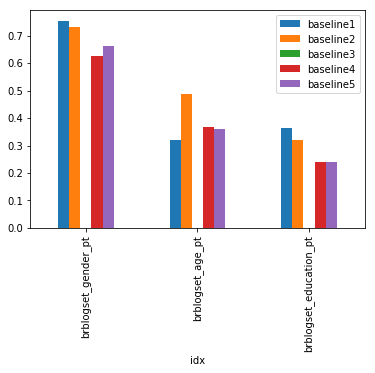

In [45]:
df = check('brblogset',None,v=1)
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
display(df)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,baseline1,baseline2,baseline3,baseline4,dataset,lang,task,baseline5
idx,,,,,,,,
pan13_gender_en,0.575037,0.552429,0.536396,0.333333,pan13,en,gender,0.603737
pan13_gender_es,0.631629,0.558898,0.535736,0.000000,pan13,es,gender,0.647167
pan13_age_en,0.504853,0.558206,0.395088,0.569808,pan13,en,age,0.656656
pan13_age_es,0.554949,0.544507,0.384822,0.000000,pan13,es,age,0.665298


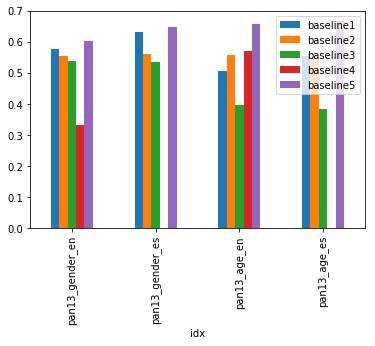

In [46]:
df = check('pan13',None,v=1)
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
display(df)

,baseline1,baseline2,baseline3,baseline4,dataset,lang,task,baseline5
idx,,,,,,,,
smscorpus_gender_en,0.739435,0.575025,0.0,0.618198,smscorpus,en,gender,0.696357
smscorpus_age_en,0.657485,0.502656,0.0,0.421493,smscorpus,en,age,0.649665


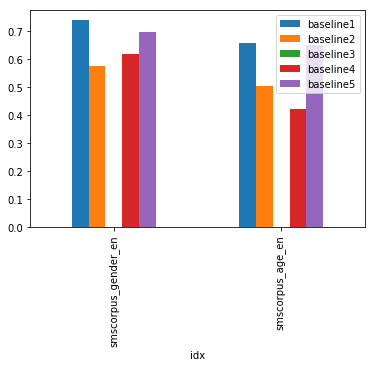

In [47]:
df = check('smscorpus',None,v=1)
df.plot(kind='bar')
display(df)

### baselines

- baseline1: TF-IDF e regressão
- baseline2: TF-IDF e CNN
- baseline3: word embeddings e CNN
 - 3.1 Kim Model = online training embeddings + CNN
 - 3.2 Proposed optimized CNN
 - 3.3 Embeddings dim = [100, 300, 600]
 
- baseline4: word embeddings e GRU